# SMS Spam Detection
    
    The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

    Acknowledgements

    The original dataset can be found in https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.


### 1. Import Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Dataset Loading and Data Preprocessing
#### 2.1. Read dataset using pandas

In [2]:
# enter here
sms = pd.read_csv("sms_spam.csv", encoding="latin-1")
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### 2.2. Remove redundant attributes

In [3]:
# enter here
sms.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### 2.3. Rename columns
Requires: v1 -> label, v2 -> message

In [4]:
# enter here
sms.columns = ["label", "message"]
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### 2.4. Modify columns
Requires: change ham to 0, and spam to 1 in Label Attribute.

In [5]:
# enter here
sms.label.replace("ham", 0, inplace = True)
sms.label.replace("spam", 1, inplace = True)
sms.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### 2.5. Add new column
Requires: Add message_len Attribute that is the length of the message.

In [6]:
# enter here
sms['length'] = sms.message.apply(len)
sms.head()

,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


#### 2.6. Histogram graph

Text(0.5, 0, 'Message Length')

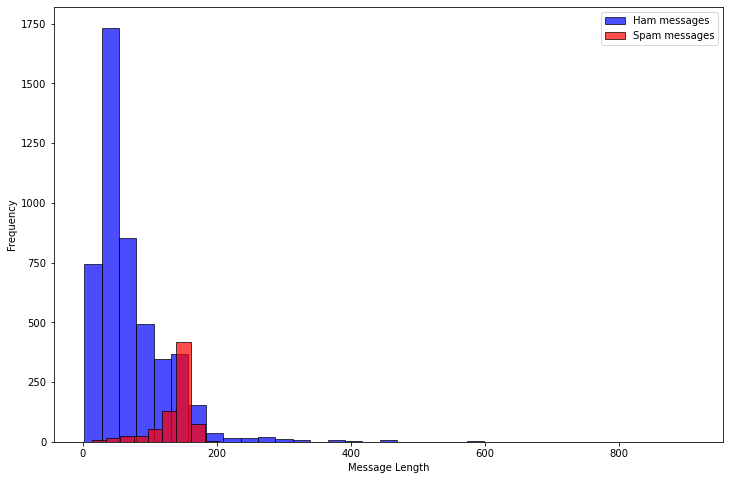

In [7]:
# enter here
plt.figure(figsize=(12, 8))

sms[sms.label == 0].length.plot.hist(bins=35, color='blue', label='Ham messages', alpha=0.7, edgecolor = 'black')
sms[sms.label == 1].length.plot.hist(bins=10, color='red', label='Spam messages', alpha=0.7, edgecolor = 'black')

plt.legend()
plt.xlabel("Message Length")
## Tin nhắn spam có xu hướng mess dài - có nhiều kí tự

#### 2.7. Preprocessing text 
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text

In [8]:
# import nltk
# nltk.download('stopwords')

In [9]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation|
    nopunc = [char for char in mess if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [10]:
# Apply the above function to preprocess the text.
# enter here
sms['clean_msg'] = sms.message.apply(text_process)
sms.head()

,label,message,length,clean_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,Go jurong point crazy Available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,Ok lar Joking wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry wkly comp win FA Cup final tkts 21s...
3,0,U dun say so early hor... U c already then say...,49,dun say early hor c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,Nah think goes usf lives around though


In [11]:
sms['length_new'] = sms.clean_msg.apply(len)
sms.head()

,label,message,length,clean_msg,length_new
0,0,"Go until jurong point, crazy.. Available only ...",111,Go jurong point crazy Available bugis n great ...,82
1,0,Ok lar... Joking wif u oni...,29,Ok lar Joking wif oni,21
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry wkly comp win FA Cup final tkts 21s...,133
3,0,U dun say so early hor... U c already then say...,49,dun say early hor c already say,31
4,0,"Nah I don't think he goes to usf, he lives aro...",61,Nah think goes usf lives around though,38


Text(0.5, 0, 'Message Length')

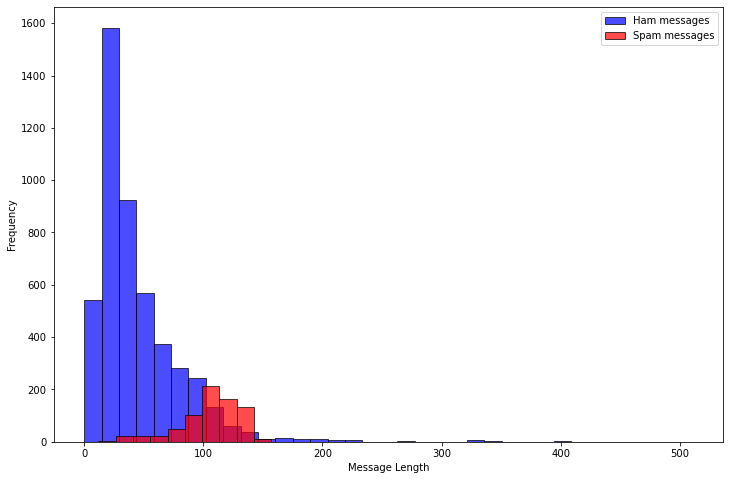

In [12]:
# Draw Histogram graph again with clean messages.
# enter here
plt.figure(figsize=(12, 8))

sms[sms.label == 0].length_new.plot.hist(bins=35, color='blue', label='Ham messages', alpha=0.7, edgecolor = 'black')
sms[sms.label == 1].length_new.plot.hist(bins=10, color='red', label='Spam messages', alpha=0.7, edgecolor = 'black')

plt.legend()
plt.xlabel("Message Length")

#### 2.8. Feature extraction using TfidfVectorizer

In [13]:
# enter here
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(sms.clean_msg)
print(X_tfidf.shape)

(5572, 9371)


#### 2.9. Feature extraction using HashingVectorizer

In [14]:
# enter here
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(n_features=10000)
X_hashing = vectorizer.fit_transform(sms.clean_msg)
print(X_hashing.shape)

(5572, 10000)


#### 2.10. Feature extraction using CountVectorizer

In [15]:
# enter here
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(sms.clean_msg)
print(X_count.shape)

(5572, 9371)


#### 2.11. Your contributions

    Create clean_msg_2 with your text_process function. 
    Then, apply feature extraction using TfidfVectorizer, HashingVectorizer and CountVectorizer
    Compare the result with the default text_process function. 

### 3. Spam detection

In [1]:
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn import metrics
import time

y = sms.label

# only using the decision tree classifier with default setting for training and predicting. 
# In other words, make no changes to this section.

model = tree.DecisionTreeClassifier()

KeyboardInterrupt: 

In [17]:
def spam_detection(X, y):
    kf = KFold(n_splits=5)
    
    accuracy = []
    
    count = 1
    
    for train, test in kf.split(X):
        print("KFold - ", count)
        print("TRAIN:", train, "----- TEST:", test)

        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]

        start = time.time()
        
        model.fit(X_train, y_train)
        
        end = time.time()
        
        print(f"The proccessing time is {end - start}s")

        y_pred_class = model.predict(X_test)

        acc = metrics.accuracy_score(y_test, y_pred_class)

        print("accuracy_score: ", acc)
        print("")

        accuracy.append(acc)

        count += 1
        
    print("--------------------------------")
        
    print("Accuracy: ", accuracy)
    
    mean_accuracy = 0
    
    for i in range(len(accuracy)):
        mean_accuracy += accuracy[i]

    mean_accuracy = mean_accuracy / len(accuracy)
    
    print("Mean_accuracy: ", mean_accuracy)
    
    return accuracy, mean_accuracy

#### 3.1. Using TF-IDF Vectorizer

    Requirements:
    1. Using 5-fold for spliting the dataset 
    2. Add accuracy of each fold to acc_tv
    3. Caculate and print the proccessing time
    4. Print mean of accuracy

In [18]:
acc_tv, mean_acc_tv = spam_detection(X_tfidf, y)

KFold -  1
TRAIN: [1115 1116 1117 ... 5569 5570 5571] ----- TEST: [   0    1    2 ... 1112 1113 1114]
The proccessing time is 0.18447232246398926s
accuracy_score:  0.957847533632287

KFold -  2
TRAIN: [   0    1    2 ... 5569 5570 5571] ----- TEST: [1115 1116 1117 ... 2227 2228 2229]
The proccessing time is 0.23237872123718262s
accuracy_score:  0.9721973094170404

KFold -  3
TRAIN: [   0    1    2 ... 5569 5570 5571] ----- TEST: [2230 2231 2232 ... 3341 3342 3343]
The proccessing time is 0.23836398124694824s
accuracy_score:  0.9640933572710951

KFold -  4
TRAIN: [   0    1    2 ... 5569 5570 5571] ----- TEST: [3344 3345 3346 ... 4455 4456 4457]
The proccessing time is 0.2044539451599121s
accuracy_score:  0.952423698384201

KFold -  5
TRAIN: [   0    1    2 ... 4455 4456 4457] ----- TEST: [4458 4459 4460 ... 5569 5570 5571]
The proccessing time is 0.2064816951751709s
accuracy_score:  0.9542190305206463

--------------------------------
Accuracy:  [0.957847533632287, 0.9721973094170404, 

#### 3.2. Using Hashing Vectorizer
    Requirements:
    1. Using 5-fold for spliting the dataset 
    2. Add accuracy of each fold to acc_hv
    3. Caculate and print the proccessing time
    4. Print mean of accuracy

In [19]:
acc_hv, mean_acc_hv = spam_detection(X_hashing, y)

KFold -  1
TRAIN: [1115 1116 1117 ... 5569 5570 5571] ----- TEST: [   0    1    2 ... 1112 1113 1114]
The proccessing time is 0.1655890941619873s
accuracy_score:  0.9497757847533632

KFold -  2
TRAIN: [   0    1    2 ... 5569 5570 5571] ----- TEST: [1115 1116 1117 ... 2227 2228 2229]
The proccessing time is 0.15160775184631348s
accuracy_score:  0.967713004484305

KFold -  3
TRAIN: [   0    1    2 ... 5569 5570 5571] ----- TEST: [2230 2231 2232 ... 3341 3342 3343]
The proccessing time is 0.13464021682739258s
accuracy_score:  0.9614003590664273

KFold -  4
TRAIN: [   0    1    2 ... 5569 5570 5571] ----- TEST: [3344 3345 3346 ... 4455 4456 4457]
The proccessing time is 0.15857529640197754s
accuracy_score:  0.9488330341113106

KFold -  5
TRAIN: [   0    1    2 ... 4455 4456 4457] ----- TEST: [4458 4459 4460 ... 5569 5570 5571]
The proccessing time is 0.15853619575500488s
accuracy_score:  0.952423698384201

--------------------------------
Accuracy:  [0.9497757847533632, 0.967713004484305,

#### 3.3. Using Count Vectorizer

    Requirements:
    1. Using 5-fold for spliting the dataset 
    2. Add accuracy of each fold to acc_cv
    3. Caculate and print the proccessing time
    4. Print mean of accuracy

In [20]:
acc_cv, mean_acc_cv = spam_detection(X_count, y)

KFold -  1
TRAIN: [1115 1116 1117 ... 5569 5570 5571] ----- TEST: [   0    1    2 ... 1112 1113 1114]
The proccessing time is 0.13866114616394043s
accuracy_score:  0.967713004484305

KFold -  2
TRAIN: [   0    1    2 ... 5569 5570 5571] ----- TEST: [1115 1116 1117 ... 2227 2228 2229]
The proccessing time is 0.13166022300720215s
accuracy_score:  0.9596412556053812

KFold -  3
TRAIN: [   0    1    2 ... 5569 5570 5571] ----- TEST: [2230 2231 2232 ... 3341 3342 3343]
The proccessing time is 0.11967968940734863s
accuracy_score:  0.966786355475763

KFold -  4
TRAIN: [   0    1    2 ... 5569 5570 5571] ----- TEST: [3344 3345 3346 ... 4455 4456 4457]
The proccessing time is 0.12467050552368164s
accuracy_score:  0.9560143626570916

KFold -  5
TRAIN: [   0    1    2 ... 4455 4456 4457] ----- TEST: [4458 4459 4460 ... 5569 5570 5571]
The proccessing time is 0.12467098236083984s
accuracy_score:  0.9560143626570916

--------------------------------
Accuracy:  [0.967713004484305, 0.9596412556053812

In [21]:
print("tfidf: ", acc_tv)
print("hashing: ", acc_hv)
print("count: ", acc_cv)

tfidf:  [0.957847533632287, 0.9721973094170404, 0.9640933572710951, 0.952423698384201, 0.9542190305206463]
hashing:  [0.9497757847533632, 0.967713004484305, 0.9614003590664273, 0.9488330341113106, 0.952423698384201]
count:  [0.967713004484305, 0.9596412556053812, 0.966786355475763, 0.9560143626570916, 0.9560143626570916]


#### 3.4. Ploting Accuracies in 5-Folds

Text(0, 0.5, 'Accuracy')

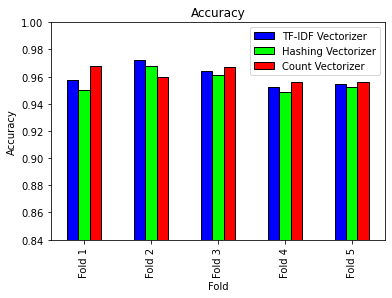

In [22]:
index = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

df = pd.DataFrame({'TF-IDF Vectorizer': acc_tv, 
                   'Hashing Vectorizer': acc_hv, 
                   'Count Vectorizer': acc_cv}, index=index)

ax = df.plot.bar(rot=90, edgecolor ='black', color={"TF-IDF Vectorizer": "blue", 
                                                    "Hashing Vectorizer": "lime", 
                                                    "Count Vectorizer" :"red"})

plt.ylim([0.84, 1])
plt.title("Accuracy")
plt.xlabel("Fold")
plt.ylabel("Accuracy")

In [23]:
print("Mean accuracy of TF-IDF Vectorizer: ", mean_acc_tv)
print("Mean accuracy of Hashing Vectorizer: ", mean_acc_hv)
print("Mean accuracy of Count Vectorizer: ", mean_acc_cv)

Mean accuracy of TF-IDF Vectorizer:  0.9601561858450539
Mean accuracy of Hashing Vectorizer:  0.9560291761599213
Mean accuracy of Count Vectorizer:  0.9612338681759265
